In [1]:
library(tidyverse)
library(ROCR)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: gplots
Warning message:
“package ‘gplots’ was built under R version 3.6.3”
Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [2]:
paramspace = read.csv("../data/metadata/paramspace_cfDNA_phaseI.csv")

paramspace  <- paramspace %>% rename(patient_id = pt_id)
head(paramspace)

patient_id,cfDNA_folder,cfDNA_file,cfDNA_bam_path,unique_kmers_folder
C04689,C303A04689D_cfdna_N295-103,C303A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C303A04689D_cfdna_N295-103/C303A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C305A04689D_cfdna_N295-71,C305A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C305A04689D_cfdna_N295-71/C305A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C309A04689D_cfdna_N295-47,C309A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C309A04689D_cfdna_N295-47/C309A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C302A04689D_cfdna_N295-102,C302A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C302A04689D_cfdna_N295-102/C302A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C299A04689D_cfdna_N295-99,C299A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C299A04689D_cfdna_N295-99/C299A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C307A04689D_cfdna_N295-110,C307A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C307A04689D_cfdna_N295-110/C307A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450


In [3]:
nrow(paramspace)

[1] 190

In [4]:
#filetype = # "ratio_cs1e9" # "ratio_singletons_excluded_tumor_cs" # "ratio_singletons_excluded_tumor_4_cs"
filetype = "ratio_cs1e9"

paramspace["big_ratio"] <- NA
paramspace["big_ratio_CI_lower"] <- NA
paramspace["big_ratio_CI_upper"] <- NA

paramspace["small_ratio"] <- NA
paramspace["small_ratio_CI_lower"] <- NA
paramspace["small_ratio_CI_upper"] <- NA

for (row in 1:nrow(paramspace)){
    pt = paramspace[row, "patient_id"]
    #print(pt)
    fd = paramspace[row, "cfDNA_folder"]
    big_r = read.csv(paste("../data/", pt, "/" , fd, "/", "big_", filetype, ".csv", sep = ""))
    small_r = read.csv(paste("../data/", pt, "/", fd, "/", "small_", filetype, ".csv", sep = ""))
    #print(big_r[[1]])
    #print(small_r[[1]])
    paramspace[row, "big_ratio"] = big_r$ratio
    paramspace[row, "big_ratio_CI_lower"] = big_r$lower_CI
    paramspace[row, "big_ratio_CI_upper"] = big_r$upper_CI
    
    paramspace[row, "small_ratio"] = small_r$ratio
    paramspace[row, "small_ratio_CI_lower"] = small_r$lower_CI
    paramspace[row, "small_ratio_CI_upper"] = small_r$upper_CI
}

In [5]:
res <- paramspace
head(res)

patient_id,cfDNA_folder,cfDNA_file,cfDNA_bam_path,unique_kmers_folder,big_ratio,big_ratio_CI_lower,big_ratio_CI_upper,small_ratio,small_ratio_CI_lower,small_ratio_CI_upper
C04689,C303A04689D_cfdna_N295-103,C303A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C303A04689D_cfdna_N295-103/C303A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05189433,0.05188734,0.05190118,0.02074863,0.02074512,0.02075215
C04689,C305A04689D_cfdna_N295-71,C305A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C305A04689D_cfdna_N295-71/C305A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05617413,0.05616722,0.05618088,0.02539762,0.02539374,0.02540149
C04689,C309A04689D_cfdna_N295-47,C309A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C309A04689D_cfdna_N295-47/C309A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04978627,0.04977972,0.04979293,0.02039574,0.02039226,0.02039923
C04689,C302A04689D_cfdna_N295-102,C302A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C302A04689D_cfdna_N295-102/C302A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05131915,0.05131268,0.05132554,0.02291046,0.02290677,0.02291415
C04689,C299A04689D_cfdna_N295-99,C299A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C299A04689D_cfdna_N295-99/C299A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05207213,0.05206557,0.05207856,0.02370418,0.02370043,0.02370793
C04689,C307A04689D_cfdna_N295-110,C307A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C307A04689D_cfdna_N295-110/C307A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05247958,0.05247293,0.05248621,0.02311462,0.02311092,0.02311833


In [6]:
#res <- res %>% separate(cfDNA_folder, c("sampleID", "sample_type", "sample_number"))
res <- res %>% 
  mutate(tmp_chunks = stringr::str_split(cfDNA_folder, stringr::fixed("_"),  n = 3)) %>%
  mutate(sampleID = map_chr(tmp_chunks, 1),
         sub_value = map_chr(tmp_chunks, 2), 
         sub_val = map_chr(tmp_chunks, 3)) %>%
  select(-c(tmp_chunks, sub_value, sub_val))

head(res)
dim(res)

patient_id,cfDNA_folder,cfDNA_file,cfDNA_bam_path,unique_kmers_folder,big_ratio,big_ratio_CI_lower,big_ratio_CI_upper,small_ratio,small_ratio_CI_lower,small_ratio_CI_upper,sampleID
C04689,C303A04689D_cfdna_N295-103,C303A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C303A04689D_cfdna_N295-103/C303A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05189433,0.05188734,0.05190118,0.02074863,0.02074512,0.02075215,C303A04689D
C04689,C305A04689D_cfdna_N295-71,C305A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C305A04689D_cfdna_N295-71/C305A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05617413,0.05616722,0.05618088,0.02539762,0.02539374,0.02540149,C305A04689D
C04689,C309A04689D_cfdna_N295-47,C309A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C309A04689D_cfdna_N295-47/C309A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04978627,0.04977972,0.04979293,0.02039574,0.02039226,0.02039923,C309A04689D
C04689,C302A04689D_cfdna_N295-102,C302A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C302A04689D_cfdna_N295-102/C302A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05131915,0.05131268,0.05132554,0.02291046,0.02290677,0.02291415,C302A04689D
C04689,C299A04689D_cfdna_N295-99,C299A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C299A04689D_cfdna_N295-99/C299A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05207213,0.05206557,0.05207856,0.02370418,0.02370043,0.02370793,C299A04689D
C04689,C307A04689D_cfdna_N295-110,C307A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C307A04689D_cfdna_N295-110/C307A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05247958,0.05247293,0.05248621,0.02311462,0.02311092,0.02311833,C307A04689D


[1] 190  12

In [7]:
pos_neg = read.csv("../data/metadata/pos_neg_samples_phaseI.csv")
head(pos_neg)

sampleID,pos_neg_samples
C299A04689D,1
C300A04689D,NA
C301A04689D,NA
C302A04689D,NA
C303A04689D,NA
C304A04689D,NA


In [8]:
res <- left_join(res, pos_neg, by = c("sampleID"))
head(res)

patient_id,cfDNA_folder,cfDNA_file,cfDNA_bam_path,unique_kmers_folder,big_ratio,big_ratio_CI_lower,big_ratio_CI_upper,small_ratio,small_ratio_CI_lower,small_ratio_CI_upper,sampleID,pos_neg_samples
C04689,C303A04689D_cfdna_N295-103,C303A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C303A04689D_cfdna_N295-103/C303A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05189433,0.05188734,0.05190118,0.02074863,0.02074512,0.02075215,C303A04689D,NA
C04689,C305A04689D_cfdna_N295-71,C305A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C305A04689D_cfdna_N295-71/C305A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05617413,0.05616722,0.05618088,0.02539762,0.02539374,0.02540149,C305A04689D,NA
C04689,C309A04689D_cfdna_N295-47,C309A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C309A04689D_cfdna_N295-47/C309A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.04978627,0.04977972,0.04979293,0.02039574,0.02039226,0.02039923,C309A04689D,NA
C04689,C302A04689D_cfdna_N295-102,C302A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C302A04689D_cfdna_N295-102/C302A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05131915,0.05131268,0.05132554,0.02291046,0.02290677,0.02291415,C302A04689D,NA
C04689,C299A04689D_cfdna_N295-99,C299A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C299A04689D_cfdna_N295-99/C299A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05207213,0.05206557,0.05207856,0.02370418,0.02370043,0.02370793,C299A04689D,1
C04689,C307A04689D_cfdna_N295-110,C307A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C307A04689D_cfdna_N295-110/C307A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05247958,0.05247293,0.05248621,0.02311462,0.02311092,0.02311833,C307A04689D,NA


In [9]:
res <- res %>% filter(!is.na(pos_neg_samples))
head(res)
dim(res)

patient_id,cfDNA_folder,cfDNA_file,cfDNA_bam_path,unique_kmers_folder,big_ratio,big_ratio_CI_lower,big_ratio_CI_upper,small_ratio,small_ratio_CI_lower,small_ratio_CI_upper,sampleID,pos_neg_samples
C04689,C299A04689D_cfdna_N295-99,C299A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C299A04689D_cfdna_N295-99/C299A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05207213,0.05206557,0.05207856,0.02370418,0.02370043,0.02370793,C299A04689D,1
C04689,C312A04689D_cfdna_N295-162,C312A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C312A04689D_cfdna_N295-162/C312A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05377134,0.05376496,0.05377757,0.02418719,0.02418341,0.02419098,C312A04689D,0
C04689,C311A04689D_cfdna_N295-157,C311A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C311A04689D_cfdna_N295-157/C311A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,0.05001166,0.05000541,0.05001806,0.02198170,0.02197809,0.02198532,C311A04689D,0
C04816,C282A04816D_cfdna_N295-189,C282A04816D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04816/C282A04816D_cfdna_N295-189/C282A04816D_cfdna.aligned.sorted.markdup.bam,C265T04816D_frfr_N295-451,0.02606858,0.02606568,0.02607144,0.01602521,0.01602296,0.01602746,C282A04816D,0
C04816,C270A04816D_cfdna_N295-104,C270A04816D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04816/C270A04816D_cfdna_N295-104/C270A04816D_cfdna.aligned.sorted.markdup.bam,C265T04816D_frfr_N295-451,0.01795606,0.01795382,0.01795830,0.01402627,0.01402416,0.01402838,C270A04816D,1
C04816,C283A04816D_cfdna_N295-196,C283A04816D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04816/C283A04816D_cfdna_N295-196/C283A04816D_cfdna.aligned.sorted.markdup.bam,C265T04816D_frfr_N295-451,0.01721479,0.01721253,0.01721705,0.01218351,0.01218154,0.01218548,C283A04816D,0


[1] 35 13

png 
  2

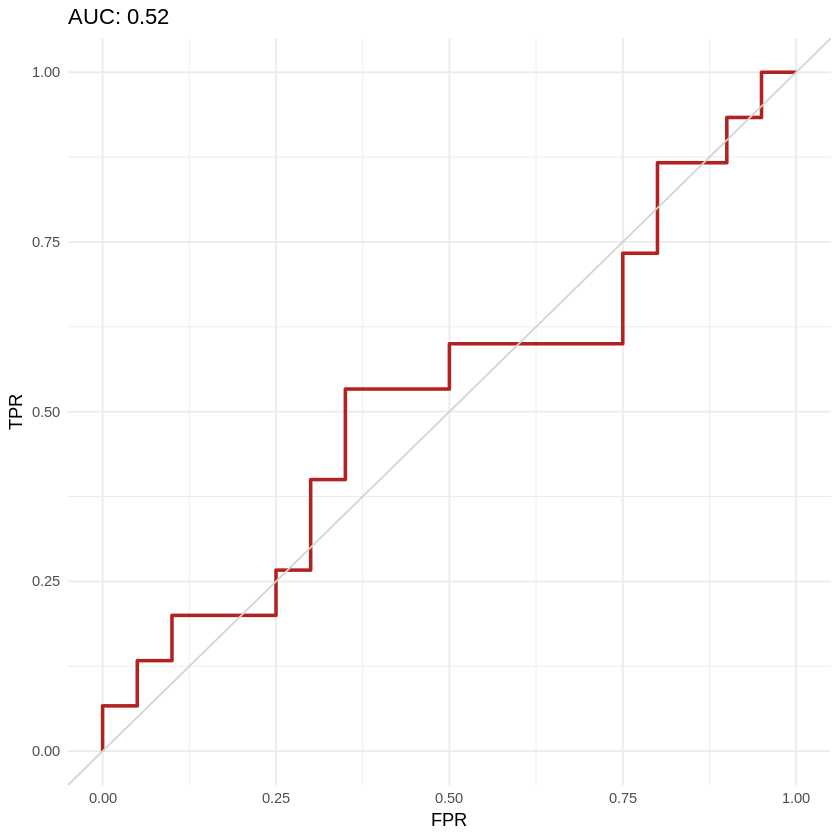

In [12]:
pred <- prediction(res$big_ratio, res$pos_neg_samples)
perf <- performance(pred,"tpr","fpr")
perf <- tibble(FPR = perf@x.values[[1]], TPR = perf@y.values[[1]])

auc <- performance(pred, measure = "auc")
auc <- auc@y.values[[1]]

p_big_ratio <- ggplot() + geom_line(data = perf, aes(x = FPR, y=TPR), color = "firebrick", size = 1) + 
           geom_abline(intercept = 0, slope = 1, color = "lightgrey", size = 0.5) +
           theme_minimal() + ggtitle(paste("AUC: ", round(auc, 2), sep = ""))

print(p_big_ratio)
png(paste("../plotting_results/ROC_curves/ROC_big_", filetype, ".png", sep = ""))
print(p_big_ratio)
dev.off()

png 
  2

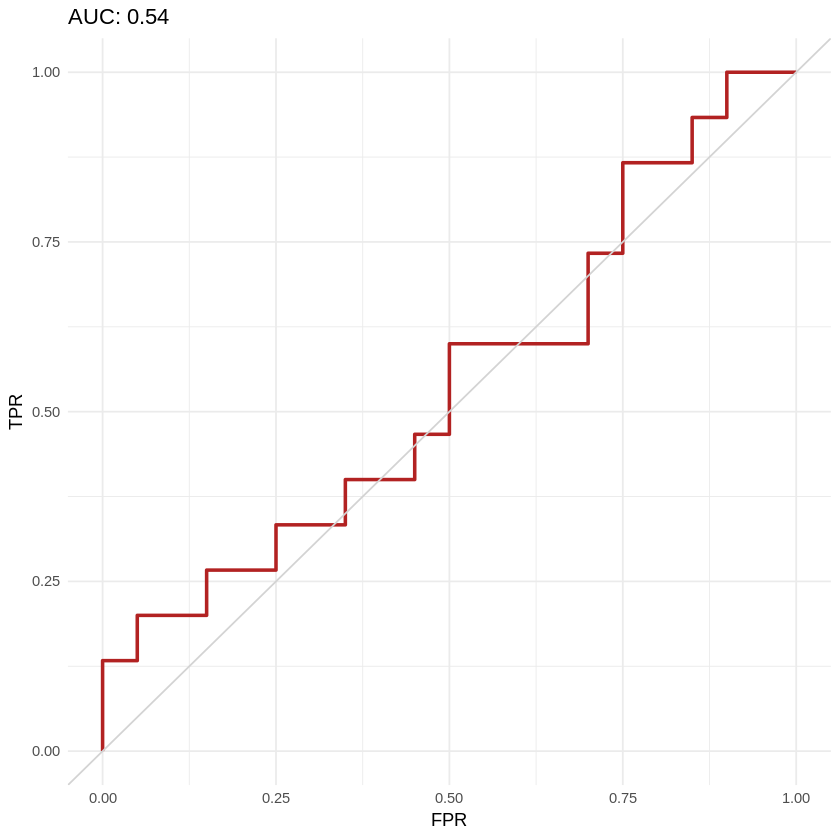

In [11]:
pred <- prediction(res$small_ratio, res$pos_neg_samples)
perf <- performance(pred,"tpr","fpr")
perf <- tibble(FPR = perf@x.values[[1]], TPR = perf@y.values[[1]])

auc <- performance(pred, measure = "auc")
auc <- auc@y.values[[1]]

p_small_ratio <- ggplot() + geom_line(data = perf, aes(x = FPR, y=TPR), color = "firebrick", size = 1) + 
           geom_abline(intercept = 0, slope = 1, color = "lightgrey", size = 0.5) +
           theme_minimal() + ggtitle(paste("AUC: ", auc, sep = ""))

print(p_small_ratio)
png(paste("../plotting_results/ROC_curves/ROC_small_", filetype, ".png", sep = ""))
print(p_small_ratio)
dev.off()